# Program to Predict A Restaurant food cost

# Problem Definition

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

# Problem Description

Size of training set: 12,690 records

Size of test set: 4,231 records

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading training data
df=pd.read_excel(r"C:\Users\arunp\Downloads\Restaurant_food_cost\Participants_Data_Final\Data_train.xlsx")
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
#loading test data
df_test=pd.read_excel(r"C:\Users\arunp\Downloads\Restaurant_food_cost\Participants_Data_Final\Data_test.xlsx")
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


###### Attributes Description

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

# Basic Statistics of Our DataSet

In [4]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
#column names
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
#datatypes of the Attributes
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [7]:
#No of rows and columns
df.shape

(12690, 9)

# Finding Missing Values

In [8]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

###### Observation:
    
    we find missing values in column
    
    1)CITY
    
    2)LOCALITY
    
    3)RATINGS
    
    4)VOTES
    
    now we will fill the Nan with appropriate values

# Dropping Missing Values

In [9]:
#Dropping Missing Values
df.dropna(inplace=True)

In [10]:
df.shape

(11393, 9)

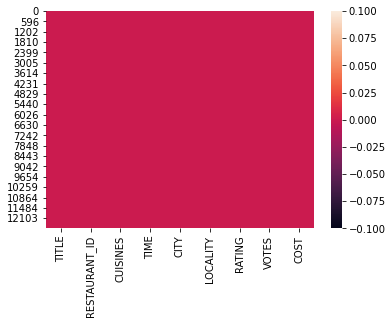

In [11]:
#Graphical Visuvalization of Missing values
sns.heatmap(df.isnull())

In [12]:
df.shape

(11393, 9)

In [13]:
#Investigating the entire dataset first
df.duplicated().sum()

21

In [14]:
df= df.drop_duplicates()

In [15]:
df.shape

(11372, 9)

# Data Preprocessing

## exploring columns of Data type Object

### column RESTAURANT ID

In [16]:
df["RESTAURANT_ID"].value_counts()

7264     7
9910     6
4634     6
12747    5
8032     5
        ..
6630     1
485      1
2532     1
12771    1
0        1
Name: RESTAURANT_ID, Length: 10705, dtype: int64

###### Observation:

    The column RESTAURANT_ID not gonna help in any way for our prediction.
    
    So dropping of column RESTAURANT_ID is recommended

In [17]:
#Dropping column RESTAURANT_ID
df.drop("RESTAURANT_ID",axis=1,inplace=True)

In [18]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


### Column TIME

In [19]:

df["TIME"].value_counts()

11am – 11pm (Mon-Sun)                                1246
12noon – 12midnight (Mon-Sun)                         433
12noon – 11pm (Mon-Sun)                               381
11am – 12midnight (Mon-Sun)                           277
12noon – 1am (Mon-Sun)                                188
                                                     ... 
9am – 10pm (Mon-Fri),8:30am – 10pm (Sat),9:5am...       1
12midnight – 1am, 11:30am – 12midnight (Mon-Sun)        1
9am – 10pm (Mon-Sat),10am – 9pm (Sun)                   1
8am – 10:30am, 11:30am – 11pm (Mon-Sun)                 1
12:15pm – 2:30am (Mon-Sun)                              1
Name: TIME, Length: 2543, dtype: int64

###### Observation:

    The column TIME is not gonna help in any way for our prediction.
    
    So dropping of column TIME is recommended

In [20]:
#Dropping column TIME
df.drop("TIME",axis=1,inplace=True)

In [21]:
df.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300


### Column LOCALITY

In [22]:
df["LOCALITY"].value_counts()

Gachibowli               166
Indiranagar              131
Madhapur                 116
Kukatpally               115
Banjara Hills            112
                        ... 
Saroor Nagar West          1
Koramangala 8th Block      1
Sector 47                  1
Near Perambur              1
Mogappair West Garden      1
Name: LOCALITY, Length: 1311, dtype: int64

###### Observation:

    since we are using column "CITY" , we are in no need for column "LOCALITY"
    
    So dropping of column "LOCALITY" is recommended

In [23]:
df.drop("LOCALITY",axis=1,inplace=True)

In [24]:
df.head(2)

,TITLE,CUISINES,CITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,4.2,30 votes,1500


### column CITY

In [25]:

df["CITY"].nunique()

336

###### Observation:

    The column CITY shows there are lot of misspelled words
    
    so replacing the misspelled word with the right one

In [26]:
#replacing misspelled Banglore in column CITY
df.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                              '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout','Vijaya Nagar','Sarjapur'
                        'HBR Layout','HBR Layout','Rajiv gandhi Nagar','Brigade Road','Off Brigade Road','Sarjapur'], 
                                value='Bangalore',inplace=True)

In [27]:
#replacing misspelled chennai in column CITY
df.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur','Outer Ring Road','MG Road'
                        'Sathya Nagar','Sathya Nagar','Nallala Street','Andavar Nagar'],
                                value='Chennai',inplace=True)

In [28]:
#replacing misspelled Kochi in column CITY
df.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                             'Kochi-16','Kochi.','Veliaveetil house Vivekananda Nagar Elamakkara','Elamakkara','682036','Thykoodam','chullickal'
                            'Nedumbassery','Nedumbassery','Kalamassery','Aluva','aluva circle',"kochi",'Mig Housing Society'
                        'Tripunithura','Tripunithura','Mig Housing Society','Thevera'],value='Kochi',inplace=True)

In [29]:
#replacing misspelled hyderabad in column CITY
df.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills','Serilingampally',"Madhuranagar",'Kothaguda','Mehdipatnam',
                               'Gandipet','Metro Pillar No 21. Mettuguda main road near railway degree college.','Khairatabad','Kukatpally'
                          'Behind Ramalayam Temple','Behind Ramalayam Temple','Nizampet','Uppal','Ramanthapur'
                      'Lahari Apartments','Manikonda',
       'Lahari Apartments','Ramanthapur','TCS Synergy park','Himayath Nagar','Narayanguda','Begumpet','Kukatapally'
                      'Champapet','Champapet'],value='Hyderabad',inplace=True)

In [30]:
#replacing misspelled Secunderabad in column CITY
df.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                              'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.','West Maredpally','West Maredpally'],
                                value='Secunderabad',inplace=True)

In [31]:
#replacing misspelled NewDelhi in column CITY
df.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram','opp gurudwara Shakurpur','Rohini','Karol Bagh'
                      'Pitampura','Pitampura','PVR plaza cinema building Connaught Place','Karol Bagh','Sector 7 Dwarka'
                      'Near Ramlila Ground','Saket','Near Ramlila Ground','Ashok Vihar Phase 1'],value='New Delhi',inplace=True)

In [32]:
#replacing misspelled Noida in column CITY
df.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida','Ghaziabad','Uttar Pradesh','Indirapuram','Sector 1'],value='Noida',
                            inplace=True)

In [33]:
#replacing misspelled gurgaon in column CITY
df.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana','Haryana','Faridabad','Goregaon West','Rodeo Drive Sector 49', 'Sector 51'],value='Gurgaon',inplace=True)

In [34]:
#replacing misspelled Mumbai in column CITY
df.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                             'Powai','Malad East','Chembur.','Mulund East','Powai (Next to Powai Plaza)','Dombivali East','Kandivali','Kalyan West'
                             'Grant Road West','Grant Road West','Naya Nagar Mira Road','Lower Parel','Virar West','Borivali West.','Vasai west','Mulund west'
                                'Lower Parel West','Lower Parel West','Badlapur West.','Wagle Estate','Kalyan','Palm Beach Road','opp mukteshwar ashram powai','Borivali West','Bandra W','Kalyan West','Mulund west','Vasai West.','khar west','Mira raod east'],
                               value='Mumbai',inplace=True)


In [35]:
#replacing unrelated values to others in column CITY
df.replace(to_replace=['India',
       'Near Reliance Fresh', 'Adjacent To Commercial Street', 'Dwarka',
       'Golf Course Road', 'Near Jyothinivas College', 'Masab Tank','B-1 Stage','Road 3','10th avenue',
        'Haridwar Apartments','Haridwar Apartments' ,'Opposite Barathi Gas Company','1st Stage',
       'First Street', '6 & 7 - 4/64 Subhash Nagar', 'Block F','Old Railway Road','Old Railway Road','Maharaja Hotel Beside Gardania Bar'
                      'Beside Excellency Gardens','Beside Excellency Gardens','3rd Street','chullickal',
       'MG Road', 'IOB Bank Kamala Nagar', 'DLF Galleria',
       'Nallathambi Main Road', 'Citypark', 'Bhayandar',
       'Thammenahalli Village', 'Attapur.', 'Near Shangrilla Bus Stop',
       'Khar (west)', 'Kukatpally', 'Dilsukhnagar',
       'Near Munrshwara Temple', 'Mahim', 'Lingampally', 'ward X11',
       'Pokhran Road 2', 'Naharpar', 'Hosur Road',
       'Near Bharat Petroleum.', 'Sriram nagar', 'Vyttila',
       'Banjara Hills', 'Panampilly Nagar', 'Borivali East.', 'ECIL',
       'Rajanpada', 'Kukatapally', 'Maharaja Hotel Beside Gardania Bar',
       'Sector 7 Dwarka'],value='others',inplace=True)

In [36]:
df["CITY"].unique()

array(['Mumbai', 'Chennai', 'Bangalore', 'Gurgaon', 'Hyderabad', 'Kochi',
       'New Delhi', 'Noida', 'Secunderabad', 'others'], dtype=object)

In [37]:
#Mapping numeric values to column CITY
df["CITY"]=df["CITY"].map({'Mumbai':1, 'Chennai':2, 'Bangalore':3, 'Gurgaon':4, 'Hyderabad':5, 'Kochi':6,
       'New Delhi':7, 'Noida':8, 'Secunderabad':9, 'others':0}).astype(int)

In [38]:
df

,TITLE,CUISINES,CITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",1,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",2,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",2,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",1,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,1,3.8,165 votes,300
...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",5,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental",1,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",1,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",2,3.5,32 votes,400


### column TITLE

In [39]:
df["TITLE"].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'QUICK BITES,FOOD COURT', 'SWEET SHOP', 'PUB,CASUAL DINING',
       'MESS', 'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP',
       'KIOSK', 'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'DHABA',
       'CAFÉ,DESSERT PARLOR', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,DESSERT PARLOR', 'PUB,MICROBREWERY', 'LOUNGE,BAR',
      

In [40]:
Title = list(df['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in Title :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Title in a Cell : ", maxim)    



Maximum Title in a Cell :  2


###### Observation:
    
    Maximum number of TITLE mentioned in a single cell is 2
    
    So we split the column TITLE into TITLE1 and TITLE2 

In [41]:
df['TITLE1'] = df['TITLE'].str.split(",").str[0]
df['TITLE2'] = df['TITLE'].str.split(",").str[1]



In [42]:
df.head()

,TITLE,CUISINES,CITY,RATING,VOTES,COST,TITLE1,TITLE2
0,CASUAL DINING,"Malwani, Goan, North Indian",1,3.6,49 votes,1200,CASUAL DINING,NaN
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",2,4.2,30 votes,1500,CASUAL DINING,BAR
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",2,3.8,221 votes,800,CASUAL DINING,NaN
3,QUICK BITES,"Tibetan, Chinese",1,4.1,24 votes,800,QUICK BITES,NaN
4,DESSERT PARLOR,Desserts,1,3.8,165 votes,300,DESSERT PARLOR,NaN


In [43]:
df["TITLE1"].nunique(),df["TITLE2"].nunique()

(23, 19)

###### Observation:

    we seperated the major degree from TITLE into TITLE1 and TITLE2
    
    now we no need of column TITLE so dropping it

In [44]:
#Dropping column TITLE
df.drop("TITLE",axis=1,inplace=True)

### column TITLE1 and TITLE2

In [45]:
#finding nan values
df.isnull().sum()

CUISINES       0
CITY           0
RATING         0
VOTES          0
COST           0
TITLE1         0
TITLE2      9966
dtype: int64

###### Observation:

    from column TITLE1 and TITLE2 we see Missing values
    
    filling NaN values with word Missing

###### Processing column TITLE1 and TITLE2

     1)filling NaN values in column TITLE2 with word "missing"
     
     2)since the data type of column TITLE1 and TITLE2 is object we convert both into numeric using label encoding
     
     

In [46]:
#Filling column TITLE2 with "missing"
df["TITLE2"].fillna("missing",inplace=True)

In [47]:
#rechecking missing value
df.isnull().sum()

CUISINES    0
CITY        0
RATING      0
VOTES       0
COST        0
TITLE1      0
TITLE2      0
dtype: int64

### Column RATING

In [48]:
df["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [49]:
df["RATING"]=df["RATING"].astype(float)

In [50]:
df.dtypes

CUISINES     object
CITY          int32
RATING      float64
VOTES        object
COST          int64
TITLE1       object
TITLE2       object
dtype: object

### column votes

In [51]:
df["VOTES"].nunique()

1846

In [52]:
df["VOTES"].value_counts()

44 votes      69
29 votes      65
38 votes      65
28 votes      64
35 votes      64
              ..
2005 votes     1
2944 votes     1
4172 votes     1
2033 votes     1
1075 votes     1
Name: VOTES, Length: 1846, dtype: int64

###### Observation:
    
    we see that VOTES column is filled with both integer and string values
    
    All we need is the Integer value .
    
    so At fisrt we need to strip of "votes"
    
    Then We can convert VOTES column to datatype int

In [53]:
#strip of "votes"
df["VOTES"]=df["VOTES"].str.strip("votes")

In [54]:
#converting experience column to datatype int
df["VOTES"]=df["VOTES"].astype(int)

In [55]:
df.dtypes

CUISINES     object
CITY          int32
RATING      float64
VOTES         int32
COST          int64
TITLE1       object
TITLE2       object
dtype: object

### column CUISINES

In [56]:
df["CUISINES"].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [57]:
df["CUISINES"].nunique()

3913

In [58]:
df["CUISINES"].value_counts()

North Indian, Chinese                               457
South Indian                                        456
North Indian                                        447
Fast Food                                           238
Chinese                                             155
                                                   ... 
Italian, Pizza, Beverages                             1
Continental, Finger Food, Fast Food                   1
Italian, Mexican, Salad                               1
Finger Food, Continental, Asian, Chinese              1
North Indian, Mediterranean, Asian, Arabian, BBQ      1
Name: CUISINES, Length: 3913, dtype: int64

In [59]:
cuisines = list(df['CUISINES'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    



Maximum cuisines in a Cell :  8


###### Observation:

Maximum number of "CUISINES" mentioned in a single cell is 8

The column "CUISINES" have lots of values and are messy in nature.

so dropping of the columns "CUISINES" is recommended




In [60]:
df.drop("CUISINES",axis=1,inplace=True)

In [61]:
df

,CITY,RATING,VOTES,COST,TITLE1,TITLE2
0,1,3.6,49,1200,CASUAL DINING,missing
1,2,4.2,30,1500,CASUAL DINING,BAR
2,2,3.8,221,800,CASUAL DINING,missing
3,1,4.1,24,800,QUICK BITES,missing
4,1,3.8,165,300,DESSERT PARLOR,missing
...,...,...,...,...,...,...
12685,5,3.8,546,500,QUICK BITES,missing
12686,1,4.3,1214,1800,CASUAL DINING,BAR
12687,1,4.0,608,1300,LOUNGE,missing
12688,2,3.5,32,400,CASUAL DINING,missing


In [62]:
df.describe()

,CITY,RATING,VOTES,COST
count,11372.000000,11372.000000,11372.000000,11372.000000
mean,3.753166,3.784075,416.953394,682.770049
std,2.274847,0.422101,846.113843,647.315941
min,0.000000,2.000000,4.000000,50.000000
25%,2.000000,3.500000,57.000000,300.000000
50%,3.000000,3.800000,163.000000,500.000000
75%,5.000000,4.100000,457.250000,800.000000
max,9.000000,4.900000,41186.000000,14000.000000


###### KEY OBSERVATION:
    
    There are no missing values
    
    1)Here we find that the mean is higher than median in "CITY","VOTES","COST".

If the mean is HIGHER than the median, the distribution is positively skewed.

    2)the maximum and the 75% had a wide range of difference than it have to be normal in attributes "VOTES"

 we infer that we may have large outliers and skewness in some of the attributes 



# EDA

## univariate analysis

### Distplot for Rating

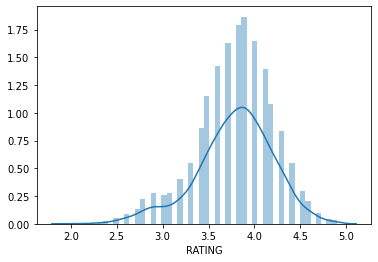

In [63]:
sns.distplot(df["RATING"])

###### OBSERVATION:

    we can see more number of restaurants having ratings between 3.5 to 4.5
    
    The graphs shows normal distribution

### Distplot for votes

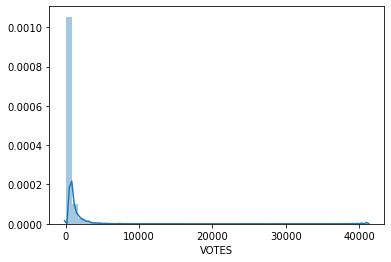

In [64]:
sns.distplot(df["VOTES"])

###### OBSERVATION:

    1)The graph shows that the column VOTES is Rightly Distributed
    
    which means the value is Positively skewed

### Distplot for COST

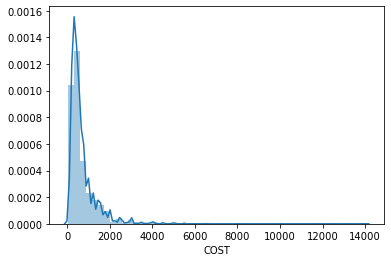

In [65]:
sns.distplot(df["COST"])

###### OBSERVATION:

    1)The graph shows that the column COST is Rightly Distributed
    
    which means the value is Positively skewed

## BIVARIATE ANALYSIS

In [66]:
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
cf.go_offline()

### Bar chart between TITLE1 and TITLE2 & COST

In [67]:
df.iplot(kind="bar",x="TITLE1",y="COST")

###### OBSERVATION:

    We can see that more people choose CAUSUAL DINING and spend more money in total when compared with others

In [68]:
df.iplot(kind="bar",x="TITLE2",y="COST")

###### Observation:

 we can see more missing value in TITLE2
 
 Next to CASUAL DINING , people prefer BAR 

### Bar chart between CITY & COST

In [69]:
df.iplot(kind="bar",x="CITY",y="COST")

###### Observation:

    People spend more money in city "MUMBAI" when compared with others
    
    Followed by city BANGLORE
    
    

### Bar chart between RATING & COST

In [70]:
df.iplot(kind="bar",x="RATING",y="COST")

###### OBSERVATION:

    People wish to spend there money on food with restaurant having ratings between 3.5 to 4.5

In [71]:
# LabelEncoding Columns

In [72]:
#LabelEncoding the column TITLE1 nd TITLE2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["TITLE1"]=le.fit_transform(df["TITLE1"])
df["TITLE2"]=le.fit_transform(df["TITLE2"])



In [73]:
df.head()

,CITY,RATING,VOTES,COST,TITLE1,TITLE2
0,1,3.6,49,1200,4,19
1,2,4.2,30,1500,4,1
2,2,3.8,221,800,4,19
3,1,4.1,24,800,21,19
4,1,3.8,165,300,8,19


## CORRELATION

In [74]:
cor=df.corr()
cor

,CITY,RATING,VOTES,COST,TITLE1,TITLE2
CITY,1.000000,-0.080221,-0.011528,-0.069157,0.082136,0.032456
RATING,-0.080221,1.000000,0.349273,0.326821,-0.177341,-0.194759
VOTES,-0.011528,0.349273,1.000000,0.244776,-0.143729,-0.170070
COST,-0.069157,0.326821,0.244776,1.000000,-0.299169,-0.255638
TITLE1,0.082136,-0.177341,-0.143729,-0.299169,1.000000,0.195906
TITLE2,0.032456,-0.194759,-0.170070,-0.255638,0.195906,1.000000


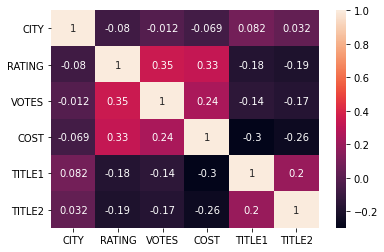

In [75]:
sns.heatmap(cor,annot=True)

###### KEY OBSERVATION:

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)RATING

2)VOTES


columns making negative correlation

1)CITY

2)TITLE1

3)TITLE2


                 
                  




Text(0.5, 1.0, 'correlation with Target Variable')

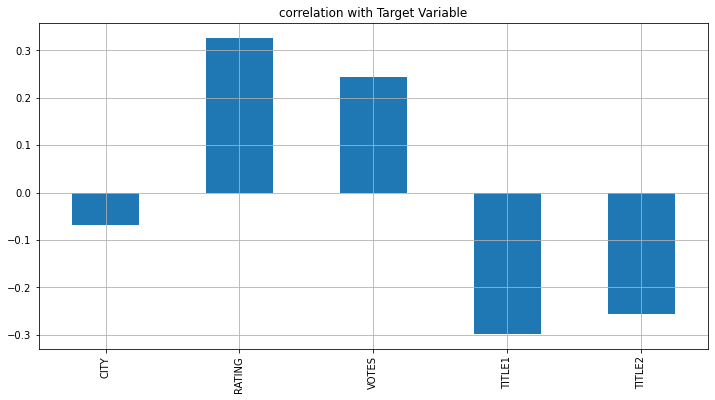

In [76]:
#correlation with Target
plt.figure(figsize=(12,6))
df.drop("COST",axis=1).corrwith(df["COST"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("correlation with Target Variable")


# Data Cleaning

## finding skewness

In [77]:
df.skew()

CITY       0.488294
RATING    -0.517433
VOTES     14.131940
COST       3.897307
TITLE1     0.143309
TITLE2    -2.950064
dtype: float64

Range of Skewness is (+/- 0.55)
from the above observation the following columns falls under high skewness

1) VOTES

2) COST

3) TITLE2




## Skewness treatment

In [78]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in df.columns:
    if df[i].skew()>0.55:
        df[i]=np.log1p(df[i])
    

In [79]:
df.skew()

CITY      0.488294
RATING   -0.517433
VOTES     0.001074
COST      0.386032
TITLE1    0.143309
TITLE2   -2.950064
dtype: float64

## Finding Outliers

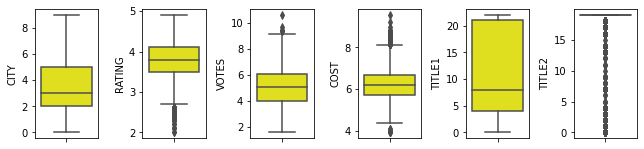

In [80]:
#Plotting Outliers
collist=df.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="yellow",orient="v")
    plt.tight_layout()               

## Treating Outliers

In [81]:
#using z-score technique
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[1.21031712, 0.43611093, 0.83456296, 1.17524218, 0.89794181,
        0.32717167],
       [0.77070786, 0.98541112, 1.17297154, 1.4846372 , 0.89794181,
        3.56783432],
       [0.77070786, 0.03772975, 0.2206932 , 0.61321068, 0.89794181,
        0.32717167],
       ...,
       [1.21031712, 0.51157044, 0.93507888, 1.28621774, 0.3228743 ,
        0.32717167],
       [0.77070786, 0.67303128, 1.12871246, 0.34684465, 0.89794181,
        0.32717167],
       [0.54811991, 0.90995162, 1.01105867, 0.21461051, 0.89794181,
        0.32717167]])

In [82]:
threshold=3
print(np.where(z>3))

(array([    1,    11,    46,   116,   144,   150,   154,   175,   176,
         177,   184,   227,   252,   270,   273,   280,   313,   320,
         325,   331,   338,   340,   351,   379,   408,   431,   433,
         436,   444,   446,   472,   482,   489,   512,   529,   546,
         558,   584,   596,   602,   610,   665,   676,   710,   734,
         756,   770,   790,   799,   807,   814,   828,   833,   851,
         882,   909,   911,   920,   930,   937,   944,   961,   964,
         976,   997,  1019,  1038,  1062,  1076,  1079,  1084,  1086,
        1088,  1096,  1141,  1158,  1179,  1213,  1251,  1253,  1258,
        1271,  1280,  1285,  1287,  1330,  1333,  1362,  1374,  1381,
        1419,  1428,  1472,  1475,  1487,  1517,  1539,  1540,  1572,
        1593,  1597,  1609,  1635,  1668,  1673,  1683,  1712,  1726,
        1741,  1779,  1796,  1798,  1805,  1839,  1864,  1868,  1881,
        1907,  1910,  1921,  1931,  1937,  1946,  1957,  1978,  1983,
        2030,  2031

In [83]:
df.shape

(11372, 6)

In [84]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(10658, 6)

In [85]:
#Percentage loss
loss=(11372-10658)/11372*100
loss

6.2785789658811115

# Seperating Target Variable


In [86]:
x_l=df_new.drop(["COST"],axis=1)
y=df_new["COST"]

# Scaling Input Variable

In [87]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[-1.21769239, -0.43181499, -0.80277825, -0.92841317,  0.2312984 ],
       [-0.7764983 ,  0.06019743,  0.26346148, -0.92841317,  0.2312984 ],
       [-1.21769239,  0.79821605, -1.29857464,  1.13305091,  0.2312984 ],
       ...,
       [-1.21769239,  0.55220984,  0.98528279,  0.28421276,  0.2312984 ],
       [-0.7764983 , -0.67782119, -1.09998938, -0.92841317,  0.2312984 ],
       [ 0.54708399, -0.9238274 ,  1.06205341, -0.92841317,  0.2312984 ]])

# Preparing dataset for model training

## splitting the testing and training data

In [88]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [90]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((8526, 5), (2132, 5), (8526,), (2132,))

In [91]:
#importing our model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
en=ElasticNet()
from sklearn.svm import SVR
svr=SVR()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [92]:
#importing error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [93]:
model=[lr,svr,knn,ls,rd,en]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2_score is :",r2_score(y_test,predm))
    print("error")
    print("mean_absolute_error is :",mean_absolute_error(y_test,predm))
    print("mean_squared_error is :",mean_squared_error(y_test,predm))
    print("root mean_absolute_error is :",np.sqrt(mean_squared_error(y_test,predm)))
    
    print("**********************************************************")
    print("\n\n")

score of  LinearRegression() is 0.31417984192133697
r2_score is : 0.31010836899531813
error
mean_absolute_error is : 0.43646898963003694
mean_squared_error is : 0.3377035800879621
root mean_absolute_error is : 0.5811226893591078
**********************************************************



score of  SVR() is 0.44127838343165693
r2_score is : 0.4195491060398503
error
mean_absolute_error is : 0.3956837112788704
mean_squared_error is : 0.2841320812518601
root mean_absolute_error is : 0.5330404124002796
**********************************************************



score of  KNeighborsRegressor() is 0.6054107456518031
r2_score is : 0.3985369534229125
error
mean_absolute_error is : 0.4057190343274261
mean_squared_error is : 0.29441757950288383
root mean_absolute_error is : 0.5426025981350291
**********************************************************



score of  Lasso() is 0.0
r2_score is : -0.00022634128295151434
error
mean_absolute_error is : 0.5483767014283376
mean_squared_error is : 0.48

# Ensemble Technique to boostup our score

In [94]:
#using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("score is",rf.score(x_train,y_train))
print("r2 score is",r2_score(y_test,rf_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,rf_pred))
print("mean squared error is : ",mean_squared_error(y_test,rf_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,rf_pred)))


score is 0.9317443518205788
r2 score is 0.5884817366274975
mean absolute error is :  0.3437785467495654
mean squared error is :  0.20143916024911432
root mean absolute error is :  0.5863263142223496


In [95]:
from sklearn.ensemble import AdaBoostRegressor
svr=SVR()
ada=AdaBoostRegressor(base_estimator=svr,n_estimators=20,learning_rate=0.1,random_state=5)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("score is",ada_score)
print("r2 score is",r2_score(y_test,ada_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,ada_pred))
print("mean squared error is : ",mean_squared_error(y_test,ada_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,ada_pred)))

score is 0.45017518681692126
r2 score is 0.42147712682234895
mean absolute error is :  0.39810852698421495
mean squared error is :  0.283188310532703
root mean absolute error is :  0.6309584193781829


###### Observation:

we observe RandomForest Regressor Performs well.

from above it is clear that the ensemble technique overfits the Linear model

### HyperTuning

    

In [96]:
#Hyper parameter Tuning
#RandomForestRegressor
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={"n_estimators" :[1,10,100], "random_state": list(range(0,10))}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 100, 'random_state': 1}


In [97]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
accuracy=r2_score(y_test,pred_test)
for i in range(2,10):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\nr2_score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

        



At cv :  2 
cross val score is :  58.63814169186243 
r2_score is:  58.55830075496564
******************************************************************************



At cv :  3 
cross val score is :  58.924553015588934 
r2_score is:  58.55830075496564
******************************************************************************



At cv :  4 
cross val score is :  58.89459796329963 
r2_score is:  58.55830075496564
******************************************************************************



At cv :  5 
cross val score is :  58.90380882677866 
r2_score is:  58.55830075496564
******************************************************************************



At cv :  6 
cross val score is :  59.08160813622726 
r2_score is:  58.55830075496564
******************************************************************************



At cv :  7 
cross val score is :  59.03301152123023 
r2_score is:  58.55830075496564
******************************************************************************


In [98]:
#using RandomForestRegressor with best Result
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1,n_estimators=100)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_train_pred=rf.predict(x_train)
rf_test_acc=r2_score(y_test,rf_test_pred)
rf_train_acc=r2_score(y_train,rf_train_pred)
print("training accuracy : ",rf_train_acc*100)
print("final accuracy : ",rf_test_acc*100)


training accuracy :  93.16666873706365
final accuracy :  58.67787168006476


# Saving Model

In [99]:
import pickle
filename="restaurant_food_cost.pkl"
pickle.dump(rf,open(filename,"wb"))


# USING THE TEST DATASET

In [100]:
#loading test data
df_test=pd.read_excel(r"C:\Users\arunp\Downloads\Restaurant_food_cost\Participants_Data_Final\Data_test.xlsx")
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [101]:
df_test.shape

(4231, 8)

In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [103]:
df_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [104]:
df_test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

# Finding Missing values

In [105]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

###### Observation:
    
    we find missing values in column
    
    1)RATINGS
    
    2)CITY
    
    3)LOCALITY
    
    4)VOTES
    
    now we will fill the Nan with appropriate values

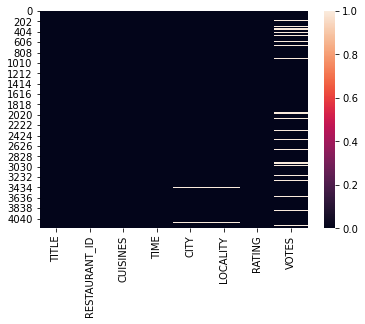

In [106]:
#Graphical Visuvalization of Missing values
sns.heatmap(df_test.isnull())

# Dropping Missing Values

In [107]:
#Dropping Missing Values
df_test.dropna(inplace=True)

In [108]:
df_test.shape

(3797, 8)

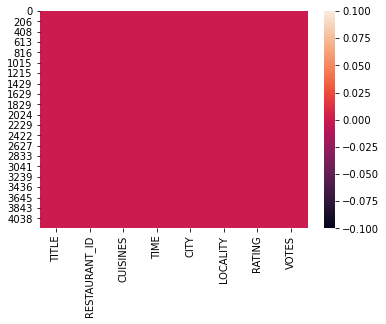

In [109]:
#Graphical Visuvalization of Missing values
sns.heatmap(df_test.isnull())

In [110]:
df_test.shape

(3797, 8)

In [111]:
#Investigating the entire dataset first
df_test.duplicated().sum()

1

In [112]:
df_test= df_test.drop_duplicates()

In [113]:
df_test.shape

(3796, 8)

# Data Preprocessing

## exploring columns of Data type Object

### column RESTAURANT ID

In [114]:
df_test["RESTAURANT_ID"].value_counts()

10391    3
15454    3
1482     3
12799    3
7656     3
        ..
7501     1
13644    1
7493     1
5444     1
10241    1
Name: RESTAURANT_ID, Length: 3702, dtype: int64

###### Observation:

    The column RESTAURANT_ID not gonna help in any way for our prediction.
    
    So dropping of column RESTAURANT_ID is recommended

In [115]:
#Dropping column RESTAURANT_ID
df_test.drop("RESTAURANT_ID",axis=1,inplace=True)

### Column TIME

In [116]:

df_test["TIME"].value_counts()

11am – 11pm (Mon-Sun)                                373
12noon – 12midnight (Mon-Sun)                        127
12noon – 11pm (Mon-Sun)                              126
11am – 12midnight (Mon-Sun)                          103
10am – 11pm (Mon-Sun)                                 68
                                                    ... 
Closed (Mon),6pm – 3am (Tue-Sun)                       1
10am – 1:30am (Mon-Sun)                                1
11am – 11pm (Mon-Sat),11am – 1am (Sun)                 1
11am – 10:45pm (Mon, Tue, Thu), 11am – 10:46pm...      1
12noon – 3:30pm, 7pm – 11pm (Mon-Tue),12noon –...      1
Name: TIME, Length: 1120, dtype: int64

###### Observation:

    The column TIME is not gonna help in any way for our prediction.
    
    So dropping of column TIME is recommended

In [117]:
#Dropping column TIME
df_test.drop("TIME",axis=1,inplace=True)

In [118]:
df_test.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350 votes
3,None,Biryani,Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23 votes


### column LOCALITY

In [119]:
df_test["LOCALITY"].value_counts()

Kukatpally               54
Madhapur                 52
Gachibowli               49
Whitefield               49
Indiranagar              45
                         ..
Jasola                    1
Kalyan East               1
B-28                      1
Koramangala 2nd Block     1
T.T.K Road                1
Name: LOCALITY, Length: 777, dtype: int64

###### Observation:

    since we are using column "CITY" , we are in no need for column "LOCALITY"
    
    So dropping of column "LOCALITY" is recommended

In [120]:
df_test.drop("LOCALITY",axis=1,inplace=True)

In [121]:
df_test.head(2)

,TITLE,CUISINES,CITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,4.2,61 votes


### column CITY

In [122]:

df_test["CITY"].nunique()

142

###### Observation:

    The column CITY shows there are lot of misspelled words
    
    so replacing the misspelled word with the right one

In [123]:
#replacing misspelled Banglore in column CITY
df_test.replace(to_replace = ['Whitefield', 'Bangalore - 560095','Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                              '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout','Vijaya Nagar','Sarjapur'
                        'HBR Layout','HBR Layout','Rajiv gandhi Nagar','Brigade Road','Off Brigade Road','Sarjapur'], 
                                value='Bangalore',inplace=True)

In [124]:
#replacing misspelled chennai in column CITY
df_test.replace(to_replace = ['Tamil Nadu 600102','Gandhinagar Rd','Sholinganallur. Chennai', 'Chennai (Above Bombay Brasserie)','Chennai 37','Vandalur','Sahakara Nagar', 'Chennai 600040','Kaaraikudi Complex',
       'Thiruvanmiyur (Opp Eurokids LB Road)', 'Chennai 40','Alwarpet','Chennai Velachery','Chennai-600008', 'Chepauk',
       'Chowpatty', 'Church Street', 'Balavinayagar Nagar Chennai',
       'RA Puram','Chenna','Chennai Injambakkam','chennai-119','Chennai - 600018','Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur','Outer Ring Road','MG Road'
                        'Sathya Nagar','Sathya Nagar','Nallala Street','Andavar Nagar'],
                                value='Chennai',inplace=True)

In [125]:
#replacing misspelled Kochi in column CITY
df_test.replace(to_replace = ['Kerala 682036','682024','Kochi Panampilly Nagar','Kerala 682022','Kerala 682028','Kerala 682021','Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                             'Kochi-16','Kochi.','Veliaveetil house Vivekananda Nagar Elamakkara','Elamakkara','682036','Thykoodam','chullickal'
                            'Nedumbassery','Nedumbassery','Kalamassery','Aluva','aluva circle',"kochi",'Mig Housing Society'
                        'Tripunithura','Tripunithura','Mig Housing Society','Thevera'],value='Kochi',inplace=True)

In [126]:
#replacing misspelled hyderabad in column CITY
df_test.replace(to_replace=['Mehdipatnam Hyderabad','Hyderaba','Hyderabad.Star hypermarket opposite side Service road','Telangana 500027','Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills','Serilingampally',"Madhuranagar",'Kothaguda','Mehdipatnam',
                               'Gandipet','Metro Pillar No 21. Mettuguda main road near railway degree college.','Khairatabad','Kukatpally'
                          'Behind Ramalayam Temple','Behind Ramalayam Temple','Nizampet','Uppal','Ramanthapur'
                      'Lahari Apartments','Manikonda',
       'Lahari Apartments','Ramanthapur','TCS Synergy park','Himayath Nagar','Narayanguda','Begumpet','Kukatapally'
                      'Champapet','Champapet'],value='Hyderabad',inplace=True)

In [127]:
#replacing misspelled Secunderabad in column CITY
df_test.replace(to_replace = [ 'Secunderbad','Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                              'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.','West Maredpally','West Maredpally'],
                                value='Secunderabad',inplace=True)

In [128]:
#replacing misspelled NewDelhi in column CITY
df_test.replace(to_replace=['India Gate New Delhi','Greater Kailash 1 (GK 1) New Delhi','Delh.','New Delhi 110011', 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram','opp gurudwara Shakurpur','Rohini','Karol Bagh'
                      'Pitampura','Pitampura','PVR plaza cinema building Connaught Place','Karol Bagh','Sector 7 Dwarka'
                      'Near Ramlila Ground','Saket','Near Ramlila Ground','Ashok Vihar Phase 1'],value='New Delhi',inplace=True)

In [129]:
#replacing misspelled Noida in column CITY
df_test.replace(to_replace=['Sector-6 Noida 201301','Girgaum','Noida Extention','Sector-6 Noida 201301','Near Sector 34','Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida','Ghaziabad','Uttar Pradesh','Indirapuram','Sector 1'],value='Noida',
                            inplace=True)

In [130]:
#replacing misspelled gurgaon in column CITY
df_test.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana','Haryana','Faridabad','Goregaon West','Rodeo Drive Sector 49', 'Sector 51','Girgaum'],value='Gurgaon',inplace=True)

In [131]:
#replacing misspelled Mumbai in column CITY
df_test.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Near Andheri West Station','Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                             'Powai','Malad East','Chembur.','Mulund East','Powai (Next to Powai Plaza)','Dombivali East','Kandivali','Kalyan West'
                             'Grant Road West','Grant Road West','Naya Nagar Mira Road','Lower Parel','Virar West','Borivali West.','Vasai west','Mulund west'
                                'Lower Parel West','Vasai Mumbai','Near Andheri West Station','Maharashtra.','Thane West Thane West','Maharashtra 400092','Mulund West','Mumbai 400070','Mohammad Ali Road Mumbai','Mumbai Veera Desai Area','Mumbai Ulhasnagar','Jogeshwari West Mumbai','Mumbai Mumbra','Kurla Mumbai','Kandivali West','Miumbai','Borivali (W) Mumbai: 400 092.','Lower Parel West','Badlapur West.','Wagle Estate','Kalyan','Palm Beach Road','opp mukteshwar ashram powai','Borivali West','Bandra W','Kalyan West','Mulund west','Vasai West.','khar west','Mira raod east'],
                               value='Mumbai',inplace=True)


In [132]:
#replacing unrelated values to others in column CITY
df_test.replace(to_replace=[ 'Opposite Ellora Building','India','Panathur Main Road', 'Secunderabad',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'APR Chambers', 'Near Andheri East Station', 'Kurla (W)',
       'Nallagandla', 'MM Nagar', 'Chittethukkara', 'BTM', 'Dombivli',
       'Tavarekere Main Road', 'Community Centre', 'Virar Mumbai',
       'Tolichowki', 'Suraram',
       'Forum Sujana Mall Opposite to Malaysian township',
       'Old Hafeezpet', 'Yousufguda', 'Habsiguda', 'Shihab Thangal Road',
       'Vanasthalipuram', 'Opposite Ellora Building'
       'Near Reliance Fresh', 'Adjacent To Commercial Street', 'Dwarka',
       'Golf Course Road', 'Near Jyothinivas College', 'Masab Tank','B-1 Stage','Road 3','10th avenue',
        'Haridwar Apartments','Haridwar Apartments' ,'Opposite Barathi Gas Company','1st Stage',
       'First Street', '6 & 7 - 4/64 Subhash Nagar', 'Block F','Old Railway Road','Old Railway Road','Maharaja Hotel Beside Gardania Bar'
                      'Beside Excellency Gardens','Beside Excellency Gardens','3rd Street','chullickal',
       'MG Road', 'IOB Bank Kamala Nagar', 'DLF Galleria',
       'Nallathambi Main Road', 'Citypark', 'Bhayandar',
       'Thammenahalli Village', 'Attapur.', 'Near Shangrilla Bus Stop',
       'Khar (west)', 'Kukatpally', 'Dilsukhnagar',
       'Near Munrshwara Temple', 'Mahim', 'Lingampally', 'ward X11',
       'Pokhran Road 2', 'Naharpar', 'Hosur Road',
       'Near Bharat Petroleum.', 'Sriram nagar', 'Vyttila',
       'Banjara Hills', 'Panampilly Nagar', 'Borivali East.', 'ECIL',
       'Rajanpada', 'Kukatapally', 'Maharaja Hotel Beside Gardania Bar',
       'Sector 7 Dwarka'],value='others',inplace=True)

In [133]:
df_test["CITY"].unique()

array(['Noida', 'Mumbai', 'Gurgaon', 'Kochi', 'Hyderabad', 'Chennai',
       'New Delhi', 'Bangalore', 'others'], dtype=object)

In [134]:
df_test["CITY"].nunique()

9

In [135]:
#Mapping numeric values to column CITY
df_test["CITY"]=df_test["CITY"].map({'Mumbai':1, 'Chennai':2, 'Bangalore':3, 'Gurgaon':4, 'Hyderabad':5, 'Kochi':6,
       'New Delhi':7, 'Noida':8, 'Secunderabad':9, 'others':0}).astype(int)


In [136]:
df_test

,TITLE,CUISINES,CITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",8,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",1,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",1,3.8,350 votes
3,None,Biryani,4,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",6,3.6,23 votes
...,...,...,...,...,...
4225,QUICK BITES,"North Indian, Mughlai, Chinese",1,4.0,197 votes
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",7,3.9,287 votes
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",3,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",4,3.7,53 votes


In [137]:
df_test.isnull().sum()

TITLE       0
CUISINES    0
CITY        0
RATING      0
VOTES       0
dtype: int64

In [138]:
df_test

,TITLE,CUISINES,CITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",8,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",1,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",1,3.8,350 votes
3,None,Biryani,4,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",6,3.6,23 votes
...,...,...,...,...,...
4225,QUICK BITES,"North Indian, Mughlai, Chinese",1,4.0,197 votes
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",7,3.9,287 votes
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",3,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",4,3.7,53 votes


### column TITLE

In [139]:
df_test["TITLE"].unique()

array(['CASUAL DINING', 'QUICK BITES', 'None',
       'FOOD TRUCK,DESSERT PARLOR', 'DESSERT PARLOR,QUICK BITES',
       'CASUAL DINING,BAR', 'LOUNGE', 'BEVERAGE SHOP',
       'CASUAL DINING,PUB', 'DESSERT PARLOR', 'PUB', 'CAFÉ', 'BAKERY',
       'LOUNGE,BAR', 'BAKERY,QUICK BITES', 'SWEET SHOP',
       'SWEET SHOP,QUICK BITES', 'BEVERAGE SHOP,QUICK BITES',
       'CAFÉ,QUICK BITES', 'DHABA', 'QUICK BITES,DESSERT PARLOR',
       'FINE DINING', 'IRANI CAFE,BAKERY', 'PUB,CASUAL DINING', 'BAR',
       'FOOD COURT', 'QUICK BITES,SWEET SHOP', 'CAFÉ,BAR', 'BAR,PUB',
       'BAKERY,DESSERT PARLOR', 'KIOSK', 'CAFÉ,BAKERY',
       'CASUAL DINING,BAKERY', 'BAKERY,CAFÉ', 'CASUAL DINING,CAFÉ',
       'MESS', 'BAR,CASUAL DINING', 'BEVERAGE SHOP,CAFÉ',
       'BEVERAGE SHOP,DESSERT PARLOR', 'PUB,FINE DINING',
       'CASUAL DINING,FOOD COURT', 'CAFÉ,CASUAL DINING',
       'LOUNGE,CASUAL DINING', 'DESSERT PARLOR,CAFÉ', 'FINE DINING,BAR',
       'CASUAL DINING,SWEET SHOP', 'LOUNGE,FINE DINING',
       '

In [140]:
Title = list(df_test['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in Title :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Title in a Cell : ", maxim)    



Maximum Title in a Cell :  2


###### Observation:
    
    Maximum number of TITLE mentioned in a single cell is 2
    
    So we split the column TITLE into TITLE1 and TITLE2 

In [141]:
df_test['TITLE1'] = df_test['TITLE'].str.split(",").str[0]
df_test['TITLE2'] = df_test['TITLE'].str.split(",").str[1]



In [142]:
df_test.head()

,TITLE,CUISINES,CITY,RATING,VOTES,TITLE1,TITLE2
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",8,4.3,564 votes,CASUAL DINING,NaN
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",1,4.2,61 votes,QUICK BITES,NaN
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",1,3.8,350 votes,CASUAL DINING,NaN
3,None,Biryani,4,3.8,1445 votes,None,NaN
4,QUICK BITES,"South Indian, Kerala",6,3.6,23 votes,QUICK BITES,NaN


In [143]:
df_test["TITLE1"].nunique(),df_test["TITLE2"].nunique()

(23, 16)

###### Observation:

    we seperated the column TITLE into TITLE1 AND TITLE2
    
    now we no need of column TITLE so dropping it

In [144]:
#Dropping column TITLE
df_test.drop("TITLE",axis=1,inplace=True)

### column TITLE1 and TITLE2

In [145]:
#finding nan values
df_test.isnull().sum()

CUISINES       0
CITY           0
RATING         0
VOTES          0
TITLE1         0
TITLE2      3358
dtype: int64

###### Observation:

    from column TITLE1 and TITLE2 we see Missing values
    
    filling NaN values with word Missing

###### Processing column TITLE1 and TITLE2

     1)filling NaN values in column TITLE2 with word "missing"
     
     2)since the data type of column TITLE1 and TITLE2 is object we convert both into numeric using label encoding
     
     

In [146]:
#Filling column TITLE2 with "missing"
df_test["TITLE2"].fillna("missing",inplace=True)

In [147]:
#rechecking missing value
df_test.isnull().sum()

CUISINES    0
CITY        0
RATING      0
VOTES       0
TITLE1      0
TITLE2      0
dtype: int64

In [148]:
#LabelEncoding the column TITLE1 nd TITLE2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test["TITLE1"]=le.fit_transform(df_test["TITLE1"])
df_test["TITLE2"]=le.fit_transform(df_test["TITLE2"])



### Column RATING

In [149]:
df_test["RATING"].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', '4.0', '3.4', '3.2', '4.1',
       '3.0', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5', '2.8',
       '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7', '2.3',
       '2.4', '2.2'], dtype=object)

In [150]:
df_test["RATING"]=df_test["RATING"].astype(float)

In [151]:
df_test.dtypes

CUISINES     object
CITY          int32
RATING      float64
VOTES        object
TITLE1        int32
TITLE2        int32
dtype: object

### column votes

In [152]:
df_test["VOTES"].nunique()

1133

In [153]:
df_test["VOTES"].value_counts()

6 votes        30
58 votes       26
22 votes       26
23 votes       24
4 votes        24
               ..
597 votes       1
15205 votes     1
6464 votes      1
1057 votes      1
442 votes       1
Name: VOTES, Length: 1133, dtype: int64

###### Observation:
    
    we see that VOTES column is filled with both integer and string values
    
    All we need is the Integer value .
    
    so At fisrt we need to strip of "votes"
    
    Then We can convert VOTES column to datatype int

In [154]:
#strip of "votes"
df_test["VOTES"]=df_test["VOTES"].str.strip("votes")

In [155]:
#converting experience column to datatype int
df_test["VOTES"]=df_test["VOTES"].astype(int)

In [156]:
df_test.dtypes

CUISINES     object
CITY          int32
RATING      float64
VOTES         int32
TITLE1        int32
TITLE2        int32
dtype: object

### column CUISINES

In [157]:
df_test["CUISINES"].unique()

array(['North Indian, Chinese, Mughlai, Kebab',
       'South Indian, Fast Food, Pizza, North Indian',
       'North Indian, Seafood, Biryani, Chinese', ...,
       'Biryani, Hyderabadi, Chinese',
       'South Indian, North Indian, Fast Food, Chinese, Beverages',
       'North Indian, Chinese, Kebab, Juices'], dtype=object)

In [158]:
df_test["CUISINES"].nunique()

1621

In [159]:
df_test["CUISINES"].value_counts()

North Indian, Chinese                      199
North Indian                               172
South Indian                               146
Fast Food                                   63
Chinese                                     53
                                          ... 
North Indian, Continental, Asian, Pizza      1
Andhra, Biryani, South Indian, Chinese       1
Arabian, Chinese, Mughlai                    1
Chinese, Japanese, Asian, North Indian       1
Biryani, Chinese, Andhra                     1
Name: CUISINES, Length: 1621, dtype: int64

In [160]:
cuisines = list(df_test['CUISINES'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    



Maximum cuisines in a Cell :  8


###### Observation:

Maximum number of "CUISINES" mentioned in a single cell is 8

The column "CUISINES" have lots of values and are messy in nature.

so dropping of the columns "CUISINES" is recommended




In [161]:
df_test.drop("CUISINES",axis=1,inplace=True)

In [162]:
df_test

,CITY,RATING,VOTES,TITLE1,TITLE2
0,8,4.3,564,5,16
1,1,4.2,61,21,16
2,1,3.8,350,5,16
3,4,3.8,1445,18,16
4,6,3.6,23,21,16
...,...,...,...,...,...
4225,1,4.0,197,21,16
4226,7,3.9,287,5,16
4227,3,4.3,469,18,16
4228,4,3.7,53,21,16


In [163]:
df.isnull().sum()

CITY      0
RATING    0
VOTES     0
COST      0
TITLE1    0
TITLE2    0
dtype: int64

# Data Cleaning

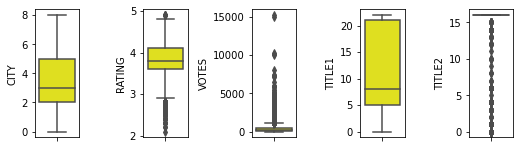

In [164]:
#Plotting Outliers
collist=df_test.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color="yellow",orient="v")
    plt.tight_layout()               

## Finding Outliers

## Treating Outliers

In [165]:
#using z-score technique
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df_test))
z


array([[2.06540596, 1.20005816, 0.15914067, 0.85513707, 0.31513412],
       [1.16161627, 0.96902962, 0.44376109, 1.17860109, 0.31513412],
       [1.16161627, 0.04491545, 0.09736227, 0.85513707, 0.31513412],
       ...,
       [0.23960992, 1.20005816, 0.04527254, 0.79727519, 0.31513412],
       [0.22139325, 0.18611309, 0.45334998, 1.17860109, 0.31513412],
       [1.16161627, 0.18611309, 0.44136387, 1.17860109, 0.31513412]])

In [166]:
threshold=3
print(np.where(z>3))

(array([  11,   26,   33,   42,   48,   60,   73,   76,   82,  108,  136,
        148,  212,  221,  228,  232,  250,  251,  288,  315,  327,  329,
        336,  346,  350,  359,  367,  378,  384,  405,  424,  450,  472,
        475,  475,  478,  502,  509,  558,  571,  583,  606,  634,  643,
        645,  657,  672,  676,  688,  714,  721,  733,  781,  787,  788,
        803,  822,  829,  830,  841,  890,  896,  897,  898,  912,  924,
        931,  944,  973,  979,  990, 1009, 1016, 1026, 1033, 1051, 1071,
       1102, 1128, 1140, 1158, 1164, 1170, 1180, 1256, 1266, 1285, 1300,
       1315, 1337, 1364, 1386, 1392, 1399, 1423, 1426, 1439, 1476, 1478,
       1507, 1549, 1558, 1578, 1589, 1593, 1595, 1600, 1610, 1668, 1673,
       1676, 1681, 1687, 1702, 1711, 1723, 1724, 1730, 1733, 1768, 1785,
       1785, 1805, 1808, 1813, 1825, 1827, 1837, 1845, 1861, 1871, 1878,
       1895, 1912, 1956, 1957, 1978, 1989, 1997, 2011, 2031, 2059, 2061,
       2062, 2082, 2082, 2102, 2109, 2111, 2117, 2

In [167]:
df_test.shape

(3796, 5)

In [173]:
df_new1=df_test[(z<3).all(axis=1)]
df_new1.shape

(3537, 5)

## finding skewness

In [169]:
df_test.skew()

CITY      0.331401
RATING   -0.580731
VOTES     6.807883
TITLE1    0.143315
TITLE2   -3.104945
dtype: float64

Range of Skewness is (+/- 0.55)
from the above observation the following columns falls under high skewness

1) VOTES

2) COST

3) TITLE2




## Skewness treatment

In [170]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in df_test.columns:
    if df_test[i].skew()>0.55:
        df_test[i]=np.log1p(df[i])
    

In [171]:
df_test.skew()

CITY      0.331401
RATING   -0.580731
VOTES    -0.620880
TITLE1    0.143315
TITLE2   -3.104945
dtype: float64

###### Data Cleaning is completed .

# Scaling Input Variable

In [172]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_df=sc.fit_transform(df_new1)
test_df


array([[ 2.07062345,  1.27666391,  0.49960028, -0.89042451,  0.21946903],
       [-1.1691747 ,  1.03754295, -0.60710581,  1.1298178 ,  0.21946903],
       [-1.1691747 ,  0.0810591 ,  0.02875515, -0.89042451,  0.21946903],
       ...,
       [-0.24351809,  1.27666391,  0.29058024,  0.75102236,  0.21946903],
       [ 0.21931022, -0.15806186, -0.62470749,  1.1298178 ,  0.21946903],
       [-1.1691747 , -0.15806186, -0.60270538,  1.1298178 ,  0.21946903]])

# Loading the Model

In [174]:
fitted_model=pickle.load(open("restaurant_food_cost.pkl","rb"))
fitted_model

RandomForestRegressor(random_state=1)

# Predicting over Test Data

In [175]:
prediction=fitted_model.predict(test_df)
prediction

array([6.66049011, 5.71389916, 6.37430679, ..., 6.0354183 , 5.65218441,
       5.380097  ])